In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, KFold
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
%matplotlib inline

D:\Scrubbo\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pokemon = pd.read_csv('pokemon+species.csv')
cp_hp = pd.read_csv('pokemonGO.csv')

IOError: File pokemon+species.csv does not exist

In [3]:
pokemon =  pd.concat([pokemon, cp_hp], axis=1)

In [4]:
pokemon

,Unnamed: 0,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,...,Pr_Female,BMI,region,Pokemon No.,Name,Type 1,Type 2,Max CP,Max HP,Image URL
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,...,0.125,13.687760,Kanto,1.0,Bulbasaur,Grass,Poison,1079.0,83.0,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,...,0.125,13.263953,Kanto,2.0,Ivysaur,Grass,Poison,1643.0,107.0,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,...,0.125,24.751863,Kanto,3.0,Venusaur,Grass,Poison,2598.0,138.0,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,3,4,Charmander,Fire,None,309,39,52,43,60,...,0.125,22.843322,Kanto,4.0,Charmander,Fire,NaN,962.0,73.0,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,4,5,Charmeleon,Fire,None,405,58,64,58,80,...,0.125,15.991920,Kanto,5.0,Charmeleon,Fire,NaN,1568.0,103.0,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...
5,5,6,Charizard,Fire,Flying,534,78,84,78,109,...,0.125,31.314879,Kanto,6.0,Charizard,Fire,Flying,2620.0,135.0,http://cdn.bulbagarden.net/upload/thumb/7/7e/0...
6,6,7,Squirtle,Water,None,314,44,48,65,50,...,0.125,34.602076,Kanto,7.0,Squirtle,Water,NaN,1015.0,81.0,http://cdn.bulbagarden.net/upload/thumb/3/39/0...
7,7,8,Wartortle,Water,None,405,59,63,80,65,...,0.125,22.956841,Kanto,8.0,Wartortle,Water,NaN,1594.0,105.0,http://cdn.bulbagarden.net/upload/thumb/0/0c/0...
8,8,9,Blastoise,Water,None,530,79,83,100,85,...,0.125,33.398438,Kanto,9.0,Blastoise,Water,NaN,2560.0,137.0,http://cdn.bulbagarden.net/upload/thumb/0/02/0...
9,9,10,Caterpie,Bug,None,195,45,30,35,20,...,0.500,32.222222,Kanto,10.0,Caterpie,Bug,NaN,446.0,83.0,http://cdn.bulbagarden.net/upload/thumb/5/5d/0...


In [4]:
pokemon.drop('Unnamed: 0', axis=1, inplace=True)
pokemon.drop('Pokemon No.', axis=1, inplace=True)
pokemon.drop('Type 1', axis=1, inplace=True)
pokemon.drop('Type 2', axis=1, inplace=True)
pokemon.drop('Image URL', axis=1, inplace=True)

In [6]:
pokemon.columns

Index([u'Number', u'Name', u'Type_1', u'Type_2', u'Total', u'HP', u'Attack',
       u'Defense', u'Sp_Atk', u'Sp_Def', u'Speed', u'Generation',
       u'isLegendary', u'Color', u'hasGender', u'Pr_Male', u'Egg_Group_1',
       u'Egg_Group_2', u'hasMegaEvolution', u'Height_m', u'Weight_kg',
       u'Catch_Rate', u'Body_Style', u'species', u'Pr_Female', u'BMI',
       u'region', u'Name', u'Max CP', u'Max HP'],
      dtype='object')

In [7]:
pokemon.shape

(721, 30)

### Generation 1 is the Target Pop.

In [37]:
gen1 = pokemon.loc[pokemon['Generation'] == 1]
gen2 = pokemon.loc[pokemon['Generation'] == 2]

In [39]:
gen2.to_csv("generation2.csv", index=False)

In [43]:
gen2 = pd.read_csv("generation2.csv")
gen2.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Weight_kg,Catch_Rate,Body_Style,species,Pr_Female,BMI,region,Name.1,Max CP,Max HP
0,152,Chikorita,Grass,None,318,45,49,65,49,65,...,6.4,45,quadruped,Leaf,0.125,8.079788,Johto,NaN,NaN,NaN
1,153,Bayleef,Grass,None,405,60,62,80,63,80,...,15.8,45,quadruped,Leaf,0.125,11.157404,Johto,NaN,NaN,NaN
2,154,Meganium,Grass,None,525,80,82,100,83,100,...,100.5,45,quadruped,Herb,0.125,31.018519,Johto,NaN,NaN,NaN
3,155,Cyndaquil,Fire,None,309,39,52,43,60,50,...,7.9,45,bipedal_tailless,Fire Mouse,0.125,30.372933,Johto,NaN,NaN,NaN
4,156,Quilava,Fire,None,405,58,64,58,80,65,...,19.0,45,quadruped,Volcano,0.125,23.986870,Johto,NaN,NaN,NaN


In [44]:
gen1.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Weight_kg,Catch_Rate,Body_Style,species,Pr_Female,BMI,region,Name,Max CP,Max HP
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,6.9,45,quadruped,Seed,0.125,13.687760,Kanto,Bulbasaur,1079.0,83.0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,13.0,45,quadruped,Seed,0.125,13.263953,Kanto,Ivysaur,1643.0,107.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,100.0,45,quadruped,Seed,0.125,24.751863,Kanto,Venusaur,2598.0,138.0
3,4,Charmander,Fire,None,309,39,52,43,60,50,...,8.5,45,bipedal_tailed,Lizard,0.125,22.843322,Kanto,Charmander,962.0,73.0
4,5,Charmeleon,Fire,None,405,58,64,58,80,65,...,19.0,45,bipedal_tailed,Flame,0.125,15.991920,Kanto,Charmeleon,1568.0,103.0


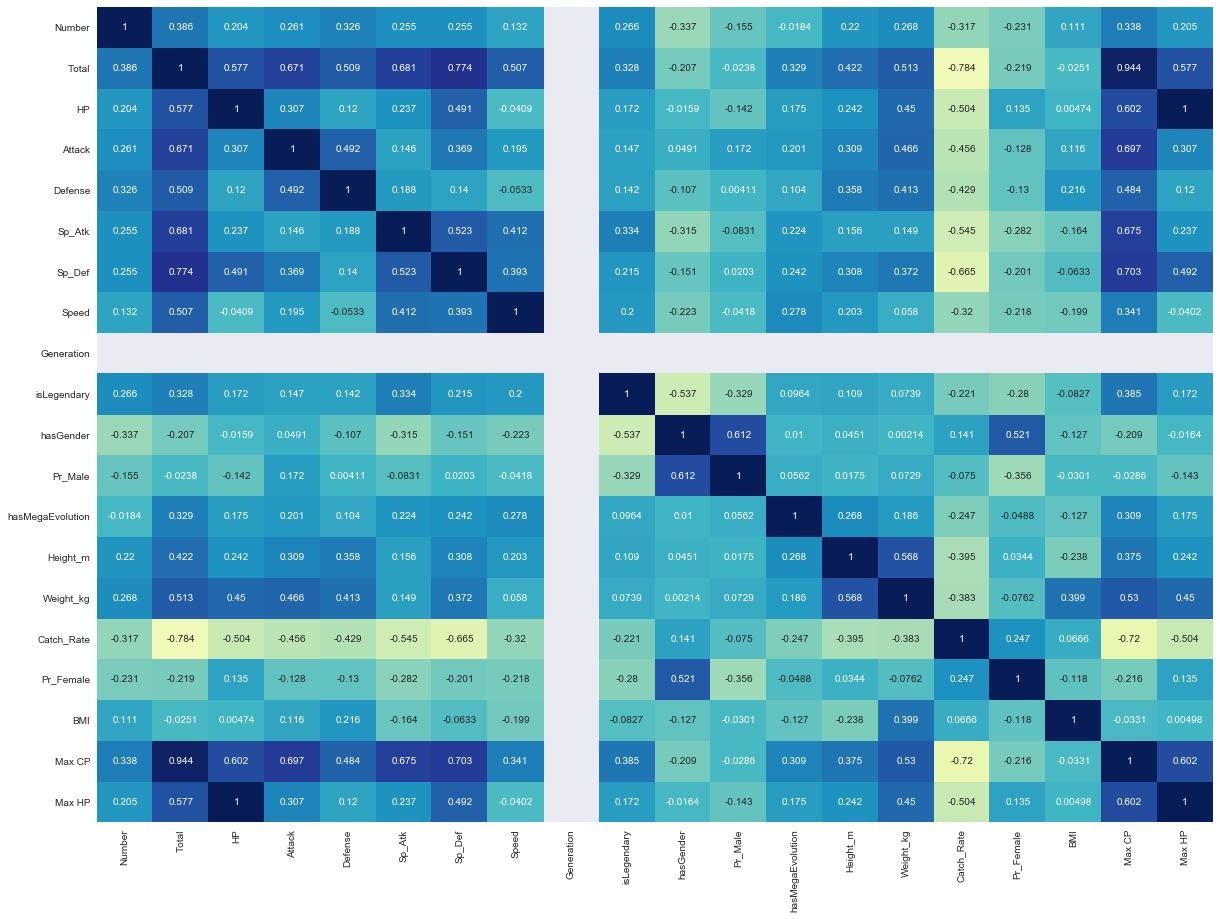

In [68]:
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(gen1.corr(), annot=True, fmt='.3g',cmap="YlGnBu", cbar=False)

## Set Features and Target Variables

In [208]:
cp_features = ['HP','Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Total', 'Weight_kg']
hp_features = ['HP','Attack', 'Sp_Atk', 'Sp_Def', 'Total', 'Weight_kg']

X_cp = gen1[cp_features]
y_cp = gen1['Max CP']

X_hp = gen1[hp_features]
y_hp = gen1['Max HP']


kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=2012)

### Cross-Validating Combat Points

In [209]:
xgb = XGBRegressor()
cross_val_score(xgb, X_cp, y_cp, cv=10, scoring='r2').mean()

0.9116300642532853

In [210]:
dt = DecisionTreeRegressor()
cross_val_score(dt, X_cp, y_cp, cv=10, scoring='r2').mean()

0.82319268193404427

In [217]:
lr = LinearRegression()
cross_val_score(lr, X_cp, y_cp, cv=5, scoring='r2').mean()

0.81801390603430169

### Cross-Val on Health Points

In [218]:
xgb = XGBRegressor()
cross_val_score(xgb, X_hp, y_hp, cv=kf, scoring='r2').mean()

0.97078752477198837

In [219]:
dt = DecisionTreeRegressor()
cross_val_score(dt, X_hp, y_hp, cv=kf, scoring='r2').mean()

0.95444882136701847

In [220]:
lr = LinearRegression()
cross_val_score(lr, X_hp, y_hp, cv=kf, scoring='r2').mean()

0.99992720685403269

## Train Test Split

In [232]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer

#### Within my Pipeline, first I scale my features then fit the model

In [248]:
lr_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

In [258]:
xgb_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('xgb', XGBRegressor())
])

## Fit Pipelines for Combat Points

#### First, try out the reigning champ, Linear Regression

In [250]:
lr_pipe.fit(X_cp,y_cp)

Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [251]:
lr_pipe.score(X_cp,y_cp)

0.93820559269557402

#### Then, the #1 Contender, XGBOOOOOOST

In [259]:
xgb_pipe.fit(X_cp,y_cp)

Pipeline(steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb', XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

In [328]:
xgb_pipe.score(X_cp,y_cp)

0.99874394517259768

In [330]:
y_pred=xgb_pipe.predict(X_cp)

In [331]:
mean_squared_error(y_cp, y_pred)**0.5

26.678347859310971

# Lets Make some predictions with both models and see how they compare

#### First, I bring in my Generation 2 Pokemon that we'll be predicting Stats for and set the features to X

In [284]:
gen2 = pd.read_csv("generation2.csv")
gen2_cp_col = pd.read_csv("gen2_cp.csv")
X = gen2[cp_features]

In [285]:
gen2['Max CP'] = gen2_cp_col['max_cp']

In [286]:
xgb_predictions = xgb_pipe.predict(X)

In [287]:
gen2['Max_CP_XGB'] = xgb_predictions

In [288]:
lr_predictions = lr_pipe.predict(X)

In [289]:
gen2['Max_CP_LR'] = lr_predictions

In [327]:
gen2.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Pr_Female,BMI,region,Name.1,Max CP,Max HP,Max_CP_XGB,Max_CP_LR,XGB_Error_CP,LR_Error_CP
0,152,Chikorita,Grass,None,318,45,49,65,49,65,...,0.125,8.079788,Johto,NaN,801,NaN,1035.458984,956.107457,54971.015354,24058.323085
1,153,Bayleef,Grass,None,405,60,62,80,63,80,...,0.125,11.157404,Johto,NaN,1296,NaN,1609.287354,1521.348802,98148.965873,50782.082601
2,154,Meganium,Grass,None,525,80,82,100,83,100,...,0.125,31.018519,Johto,NaN,2227,NaN,2544.436523,2359.949840,100765.946412,17675.659982
3,155,Cyndaquil,Fire,None,309,39,52,43,60,50,...,0.125,30.372933,Johto,NaN,831,NaN,926.334961,944.108603,9088.754777,12793.555979
4,156,Quilava,Fire,None,405,58,64,58,80,65,...,0.125,23.986870,Johto,NaN,1484,NaN,1570.316528,1595.221977,7450.543061,12370.328126


In [321]:
gen2['XGB_Error_CP'] = (gen2['Max CP'] - gen2['Max_CP_XGB'])**2
gen2['LR_Error_CP'] = (gen2['Max CP'] - gen2['Max_CP_LR'])**2

In [312]:
gen2['XGB_Error_CP'].sum()

9337356.071620427

In [322]:
(gen2['XGB_Error_CP'].sum()/100)**.5

305.5708767474483

In [323]:
(gen2['LR_Error_CP'].sum()/100)**.5

272.3183015235613

#### It looks like the model I built may be suffering from overfitting on my training data. 

In [325]:
from sklearn.metrics import mean_squared_error
XGB_RMSE = mean_squared_error(gen2['Max CP'], gen2['Max_CP_XGB'])**0.5

In [326]:
XGB_RMSE

305.57087674744832

In [318]:
LR_RMSE = mean_squared_error(gen2['Max CP'], gen2['Max_CP_LR'])**0.5

In [324]:
LR_RMSE

272.31830152356127

# RMSE's that are much higher than the training set point to a biased model

# Any code below isn't relevant. Ignore it. I'll attempt building a much more accurate model for predicting HP next time.

### From My Decision Tree, I can see the individual importance of each feature 

In [125]:
pd.DataFrame(dt.feature_importances_, index=features, columns=['importance'])

,importance
HP,0.995176
Attack,0.000228
Defense,0.000562
Sp_Atk,0.000206
Sp_Def,0.000490
Speed,0.000000
Total,0.003070
Weight_kg,0.000182
Catch_Rate,0.000000
BMI,0.000087


### GridSearchCV

In [49]:
# My models performed so well I won't specify parameters
params = {}

In [126]:
log = LogisticRegression()
gs_log = GridSearchCV(log, param_grid=params, cv=kf, scoring='r2')

gs_log.fit(X,y)

gs_log.best_score_

0.28770283877962993

In [127]:
lr = LinearRegression()
gs_lr = GridSearchCV(lr, param_grid=params, cv=kf, scoring='r2')

gs_lr.fit(X,y)

gs_lr.best_score_

0.99993083601611021

In [128]:
xgb = XGBRegressor()
gs_xg = GridSearchCV(xgb, param_grid=params, cv=kf, scoring='r2')

gs_xg.fit(X,y)

gs_xg.best_score_

0.97002006110046068

In [129]:
dt = DecisionTreeRegressor()
gs_dt = GridSearchCV(dt, param_grid=params, cv=kf, scoring='r2')

gs_dt.fit(X, y)

gs_dt.best_score_

0.94804336730828931